<a href="https://colab.research.google.com/github/ngamzedeniz/DeepLearningNanodegree/blob/main/RBM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets # for dataset
from sklearn.model_selection import train_test_split # split train and test dataset
from sklearn.metrics import classification_report # for seeing the results
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import BernoulliRBM
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 1.Load Dataset

In [ ]:
dataset = datasets.load_breast_cancer()

In [ ]:
type(dataset)

sklearn.utils.Bunch

# 2.Scale the dataset

In [ ]:
b = []
for d in dataset.data:
    for y in d:
        b.append(y)

# found using max point
scaled = dataset.data/ max(b)

# 4.Visualize target distribution

In [ ]:
target=pd.DataFrame(data=dataset.target,columns=['target'])

In [ ]:
target['target'].unique()

array([0, 1])

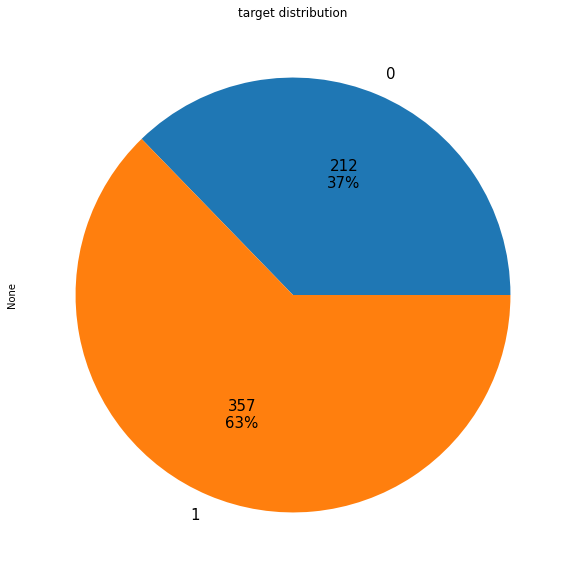

In [ ]:
fig, ax0=plt.subplots(nrows=1,ncols=1,figsize=(10, 10))

def label_function(val):
    return f'{val / 100 * len(target):.0f}\n{val:.0f}%'

target.groupby('target').size().plot(kind='pie',
                                      autopct=label_function, 
                                      textprops={'fontsize': 15},
                                      ax=ax0)                                         
ax0.set_title('target distribution')

# showing the figure
fig.show()

# 3.Split the dataset

In [ ]:
(trainX, testX, trainY, testY) = train_test_split(scaled, dataset.target, test_size = 0.33)

# 4.Define the network

In [ ]:
class rbm():
    def __init__(self, trainX, trainY,):
        super(rbm, self).__init__()

        self.trainX=trainX
        self.trainY=trainY

        # set hyperparameters
        self.C = 100.
        self.learning_rate = 0.02 # from Erhan et el. (2010): median value in grid-search
        self.total_units   =  800 # from Erhan et el. (2010): optimal for MNIST / only slightly worse than 1200 units when using InfiniteMNIST
        self.total_epochs  =   50 # from Erhan et el. (2010): optimal for MNIST
        self.batch_size    =  128 # seems like a representative sample; backprop literature often uses 256 or 512 samples

        # define layers
        self.rbm = BernoulliRBM(n_components=self.total_units, learning_rate=self.learning_rate, batch_size=self.batch_size, n_iter=self.total_epochs, verbose=1)
        
        self.logistic = LogisticRegression(C=self.C, solver='lbfgs', multi_class='multinomial', max_iter=200, verbose=1)
                                                    

    def singleRBM(self, testX,testY):
      singleRbm=Pipeline(steps=[('rbm1', clone(self.rbm)), 
                                ('logistic', clone(self.logistic))])  
      singleRbm.fit(self.trainX, self.trainY)

      # evaluate using validation set
      print("Model performance:\n%s\n" % (
          classification_report(testY, singleRbm.predict(testX))))
      y_pred=singleRbm.predict(testX)
      score=accuracy_score(y_true=testY,y_pred=y_pred)
      print(score)
    

In [ ]:
dbn=DBN(trainX,trainY)

In [ ]:
dbn.singleRBM(testX,testY)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -2.22, time = 0.06s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -1.79, time = 0.09s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -1.50, time = 0.09s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -1.02, time = 0.11s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -1.23, time = 0.10s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -1.04, time = 0.09s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -1.34, time = 0.09s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -0.93, time = 0.09s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -0.72, time = 0.09s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -1.26, time = 0.10s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -0.85, time = 0.09s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -1.05, time = 0.09s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -0.70, time = 0.10s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -0.81, time = 0.09s
[BernoulliRBM] Iteration 15, pseudo-likelih

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
